**Iterate through file folder to create**

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import gensim
import spacy
import nltk

import logging
from gensim.summarization import summarize

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

In [2]:
folder_path_a = 'H:/AI_for_Selection/a/'
folder_path_websites = 'H:/AI_for_Selection/Websites/'

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 

**Extract file features from metadata**
* file data
* file location
* date
* format
* document name
* size

In [3]:
#Metadata file is the supplied by MA to us
metadata_file = 'H:/AI_for_Selection/objective_files_with_acronyms LATEST.xlsx'
metadata_df = pd.read_excel(open(metadata_file,'rb'), sheet_name='objective_files_with_acronyms', nrows=118677)

In [4]:
len(metadata_df)

118677

In [5]:
metadata_df.columns

Index(['Unnamed: 0', 'documentid', 'objectivefileid', 'fileextension',
       'versionnumber', 'disposal_schedule', 'repository', 'datelastmodified',
       'parent11', 'parent10', 'parent9', 'parent8', 'parent7', 'parent6',
       'parent5', 'parent4', 'parent3', 'parent2', 'parent1', 'objective3',
       'objective2', 'objective1', 'originalname', 'documentname',
       'copyflatlines',
       'To the left there is the full data from the EDRMS.\nTo the right is the data with the acronyms',
       'trim_11', 'trim_10', 'trim_9', 'trim_8', 'trim_7', 'trim_6', 'trim_5',
       'trim_4', 'trim_3', 'trim_2', 'trim_1'],
      dtype='object')

In [6]:
metadata_df = metadata_df.drop(['Unnamed: 0','copyflatlines',
       'To the left there is the full data from the EDRMS.\nTo the right is the data with the acronyms'], axis = 1)

In [7]:
metadata_df.head(5)

,documentid,objectivefileid,fileextension,versionnumber,disposal_schedule,repository,datelastmodified,parent11,parent10,parent9,...,trim_10,trim_9,trim_8,trim_7,trim_6,trim_5,trim_4,trim_3,trim_2,trim_1
0,A3109716,qA35736,xls,2,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:42:31,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
1,A3133123,qA35736,xls,1,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:55:08,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
2,A3097046,qA35736,xls,4,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:54:09,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
3,A3113792,qA35736,xls,2,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:52:54,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
4,A3115138,qA35736,xls,2,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:40:05,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name


In [8]:
metadata_df['disposal_schedule'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
118672    False
118673    False
118674    False
118675    False
118676    False
Name: disposal_schedule, Length: 118677, dtype: bool

In [9]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118677 entries, 0 to 118676
Data columns (total 34 columns):
documentid           118677 non-null object
objectivefileid      118677 non-null object
fileextension        118677 non-null object
versionnumber        118677 non-null int64
disposal_schedule    118677 non-null object
repository           118677 non-null object
datelastmodified     118677 non-null object
parent11             118677 non-null object
parent10             118677 non-null object
parent9              118677 non-null object
parent8              118677 non-null object
parent7              118677 non-null object
parent6              118677 non-null object
parent5              118677 non-null object
parent4              118677 non-null object
parent3              118677 non-null object
parent2              118677 non-null object
parent1              118677 non-null object
objective3           118677 non-null object
objective2           118677 non-null object
objective1

In [10]:
print(metadata_df['disposal_schedule'].unique())

['24 Projects - Full Projects (Close file when Project ends)'
 '23 Projects - Informal internal projects (Close file when Project ends)'
 '05 Business planning & Performance - Departmental & low level corporate (Close at end of year )'
 '02 Advice & Guidance - High level (Superseded + 7 years)'
 '03 Appraisal Administration (Close file + 20years)'
 '27 Systems - ICT Systems & Equipment (Close file at end of system use)'
 '16 Licences  (Close file when license expires)' '32 Time Category 10'
 '28 Training  (Close file when superseded)'
 '07 Communication (Close at end of  year)' '33 Time Category Permanent'
 '04 Appraisal Decisions  (Close at end of year)'
 '20 Policy - Supporting documentation & non-key policies (Close file when superseded)'
 '24a Projects - Full Projects Reviewed (D 7 years after Project ends)'
 '11 Administration Ongoing - Close when superseded'
 '21 Policy - Key Final (Close file when superseded)'
 '10 Departmental/Team  - Annual Administration (Close file end of ye

In [11]:
print(metadata_df['disposal_schedule'].nunique())

20


In [12]:
metadata_df['ret_schedule']= metadata_df['disposal_schedule'].apply(lambda x: x.split()[0] )

In [13]:
metadata_df['ret_schedule'][0:10]

0    24
1    24
2    24
3    24
4    24
5    24
6    24
7    24
8    24
9    23
Name: ret_schedule, dtype: object

In [14]:
metadata_df['ret_schedule'].unique()

array(['24', '23', '05', '02', '03', '27', '16', '32', '28', '07', '33',
       '04', '20', '24a', '11', '21', '10', '25', '06', '24b'],
      dtype=object)

In [15]:
len(metadata_df.loc[metadata_df['ret_schedule'].isin (('04', '06','15b','17','21','33','34','35','36'))])

23275

In [16]:
#metadata_df['selected'] =  metadata_df['ret_schedule'].apply(lambda x: 'YES' if x in(('04', '06','15b','17','21','33','34','35','36')) else 'NO')
metadata_df['selected'] =  metadata_df['ret_schedule'].apply(lambda x: 'YES' if x in(('04', '06','15b','17','21','33')) else 'NO')

In [17]:
len(metadata_df.loc[metadata_df['selected'] == 'YES'])

23275

In [18]:
len(metadata_df.loc[metadata_df['selected'] == 'NO'])

95402

In [19]:
metadata_df.columns

Index(['documentid', 'objectivefileid', 'fileextension', 'versionnumber',
       'disposal_schedule', 'repository', 'datelastmodified', 'parent11',
       'parent10', 'parent9', 'parent8', 'parent7', 'parent6', 'parent5',
       'parent4', 'parent3', 'parent2', 'parent1', 'objective3', 'objective2',
       'objective1', 'originalname', 'documentname', 'trim_11', 'trim_10',
       'trim_9', 'trim_8', 'trim_7', 'trim_6', 'trim_5', 'trim_4', 'trim_3',
       'trim_2', 'trim_1', 'ret_schedule', 'selected'],
      dtype='object')

In [20]:
len(metadata_df.columns)

36

In [21]:
metadata_df = metadata_df.drop(['documentid', 'objectivefileid','versionnumber','objective3', 'objective2',
       'objective1'], axis = 1)

In [22]:
metadata_df.columns

Index(['fileextension', 'disposal_schedule', 'repository', 'datelastmodified',
       'parent11', 'parent10', 'parent9', 'parent8', 'parent7', 'parent6',
       'parent5', 'parent4', 'parent3', 'parent2', 'parent1', 'originalname',
       'documentname', 'trim_11', 'trim_10', 'trim_9', 'trim_8', 'trim_7',
       'trim_6', 'trim_5', 'trim_4', 'trim_3', 'trim_2', 'trim_1',
       'ret_schedule', 'selected'],
      dtype='object')

In [23]:
metadata_df['originalname'][:5]

0    A3109716.2
1    A3133123.1
2    A3097046.4
3    A3113792.2
4    A3115138.2
Name: originalname, dtype: object

In [24]:

metadata_df['documentname'][:5]

0    The National Archives RTR 09-2012                 
1    Food Standards Agency RTR - amended 30 Oct 12     
2    HM Treasury RTR 09-2012 vs 2                      
3    Foreign and Commonwealth Office RTR 09-2012 vs4   
4    Nuclear Decommissioning Authority RTR 09-2012 vs 3
Name: documentname, dtype: object

[Text(0, 0, 'Archives Sector Development'),
 Text(0, 0, 'Legislation Services'),
 Text(0, 0, 'Information Policy'),
 Text(0, 0, 'Transfer and Access'),
 Text(0, 0, 'Collections Expertise and Engagement'),
 Text(0, 0, 'Information Management'),
 Text(0, 0, 'Strategic Projects'),
 Text(0, 0, 'Web Archiving'),
 Text(0, 0, 'Document Services'),
 Text(0, 0, 'no name'),
 Text(0, 0, 'Information Management and Practice'),
 Text(0, 0, 'Collection Care'),
 Text(0, 0, 'Government Audience'),
 Text(0, 0, 'TNA Corporate Storage'),
 Text(0, 0, 'Marketing and Communications'),
 Text(0, 0, 'Digital Archiving'),
 Text(0, 0, 'Digital Preservation'),
 Text(0, 0, 'Knowledge and Information Management Team'),
 Text(0, 0, 'IT Operations'),
 Text(0, 0, 'Catalogue and Taxonomy'),
 Text(0, 0, 'Historical Manuscripts Commission'),
 Text(0, 0, 'Digital Continuity Project'),
 Text(0, 0, 'Systems Development'),
 Text(0, 0, 'Digital Services'),
 Text(0, 0, 'IPS Business Coordination Unit (IPS BCU)'),
 Text(0, 0, '

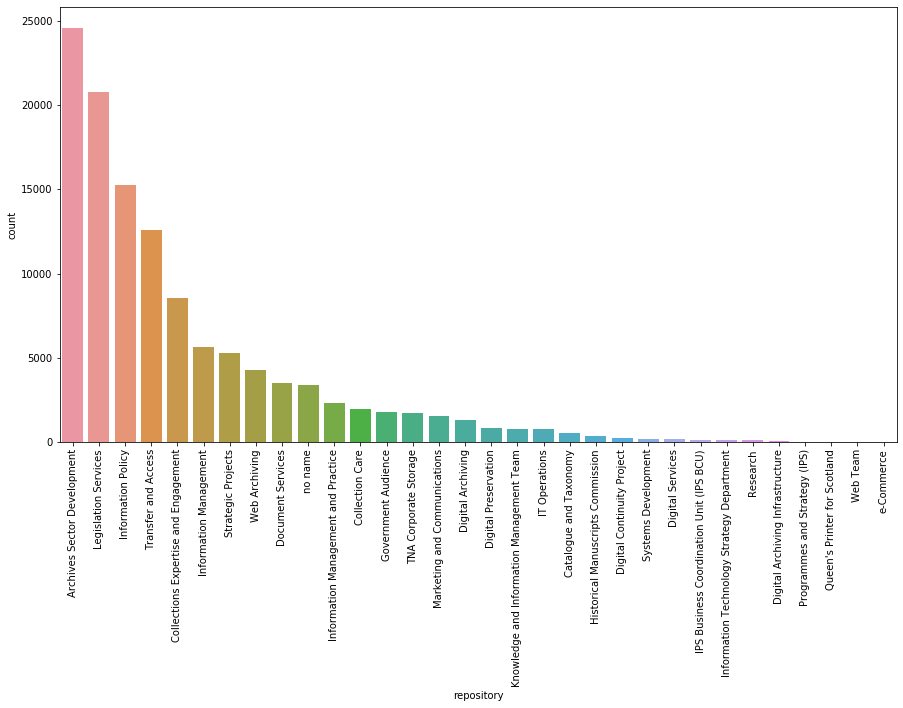

In [25]:
%matplotlib inline
plt.figure (figsize=(15,8))
p =sns.countplot(data = metadata_df, x='repository', order=metadata_df['repository'].value_counts().index)
p.set_xticklabels(p.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Archives Sector Development'),
 Text(0, 0, 'Legislation Services'),
 Text(0, 0, 'Information Policy'),
 Text(0, 0, 'Transfer and Access'),
 Text(0, 0, 'Collections Expertise and Engagement'),
 Text(0, 0, 'Information Management'),
 Text(0, 0, 'Strategic Projects'),
 Text(0, 0, 'Web Archiving'),
 Text(0, 0, 'Document Services'),
 Text(0, 0, 'no name'),
 Text(0, 0, 'Information Management and Practice'),
 Text(0, 0, 'Collection Care'),
 Text(0, 0, 'Government Audience'),
 Text(0, 0, 'TNA Corporate Storage'),
 Text(0, 0, 'Marketing and Communications'),
 Text(0, 0, 'Digital Archiving'),
 Text(0, 0, 'Digital Preservation'),
 Text(0, 0, 'Knowledge and Information Management Team'),
 Text(0, 0, 'IT Operations'),
 Text(0, 0, 'Catalogue and Taxonomy'),
 Text(0, 0, 'Historical Manuscripts Commission'),
 Text(0, 0, 'Digital Continuity Project'),
 Text(0, 0, 'Systems Development'),
 Text(0, 0, 'Digital Services'),
 Text(0, 0, 'IPS Business Coordination Unit (IPS BCU)'),
 Text(0, 0, '

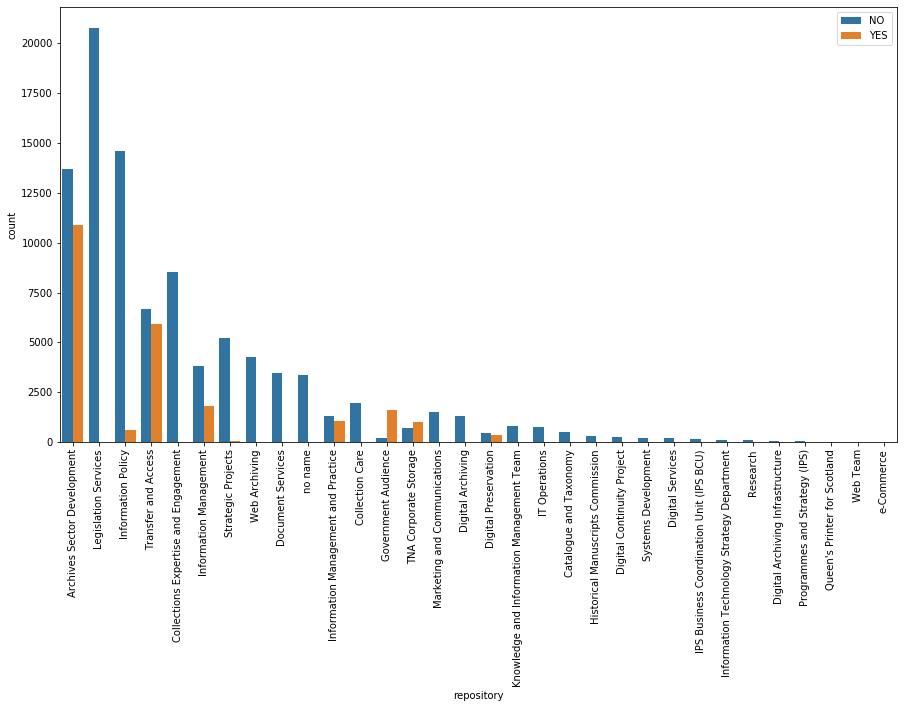

In [26]:
%matplotlib inline
plt.figure (figsize=(15,8))
p =sns.countplot(data = metadata_df, x='repository', order=metadata_df['repository'].value_counts().index, hue='selected')
plt.legend(loc='upper right')
p.set_xticklabels(p.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Archives Sector Development'),
 Text(0, 0, 'Legislation Services'),
 Text(0, 0, 'Government Audience'),
 Text(0, 0, '2003-2008 file plan'),
 Text(0, 0, 'Programme Management Office'),
 Text(0, 0, 'Web Archiving'),
 Text(0, 0, 'Document Services'),
 Text(0, 0, 'Z Corporate Disposed Records- Metadata'),
 Text(0, 0, 'Information Policy'),
 Text(0, 0, 'Procurement, Project Delivery and Contract Management'),
 Text(0, 0, 'Collections Expertise and Engagement'),
 Text(0, 0, 'Collection Care'),
 Text(0, 0, 'Shared projects'),
 Text(0, 0, 'Marketing and Communications'),
 Text(0, 0, 'IT Operations'),
 Text(0, 0, 'Knowledge and Information Management Team'),
 Text(0, 0, 'Catalogue and Taxonomy'),
 Text(0, 0, 'Digital Archiving'),
 Text(0, 0, 'Digital Services'),
 Text(0, 0, 'Research and Academic Engagement'),
 Text(0, 0, 'Access management'),
 Text(0, 0, 'Licensing, Publishing and Digitisation')]

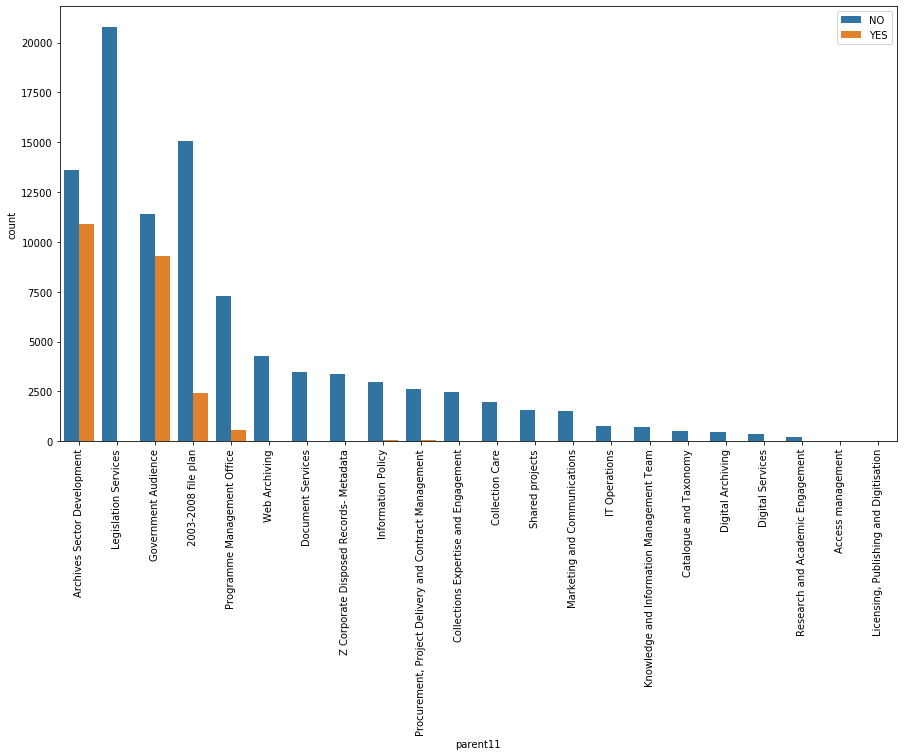

In [27]:
%matplotlib inline
plt.figure (figsize=(15,8))
p =sns.countplot(data = metadata_df, x='parent11', order=metadata_df['parent11'].value_counts().index, hue='selected')
plt.legend(loc='upper right')
p.set_xticklabels(p.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Projects & Service Development'),
 Text(0, 0, 'Public Records Bodies (by name)'),
 Text(0, 0, 'Collecting institutions & owners'),
 Text(0, 0, 'Copyright'),
 Text(0, 0, 'Transfer'),
 Text(0, 0, 'Access management'),
 Text(0, 0, 'Legacy'),
 Text(0, 0, 'Information management'),
 Text(0, 0, 'X Legacy - Legislation & Publishing Services -'),
 Text(0, 0, 'Collections Strategies'),
 Text(0, 0, 'Old File plan Structure - Projects'),
 Text(0, 0, 'Departmental administration - Resources, Finance & Business Admin'),
 Text(0, 0, 'Z Legacy'),
 Text(0, 0, 'Project Delivery'),
 Text(0, 0, 'Public Sector Information PSI'),
 Text(0, 0, 'Catalogue and Taxonomy Destroyed Records Metadata'),
 Text(0, 0, 'Strategic management'),
 Text(0, 0, 'Relationships with groups and networks'),
 Text(0, 0, 'Editorial Services'),
 Text(0, 0, 'CCD Preventive Conservation'),
 Text(0, 0, 'RMD and ILU archive'),
 Text(0, 0, 'Seamless flow programme'),
 Text(0, 0, 'Information Resources & Collection Databases

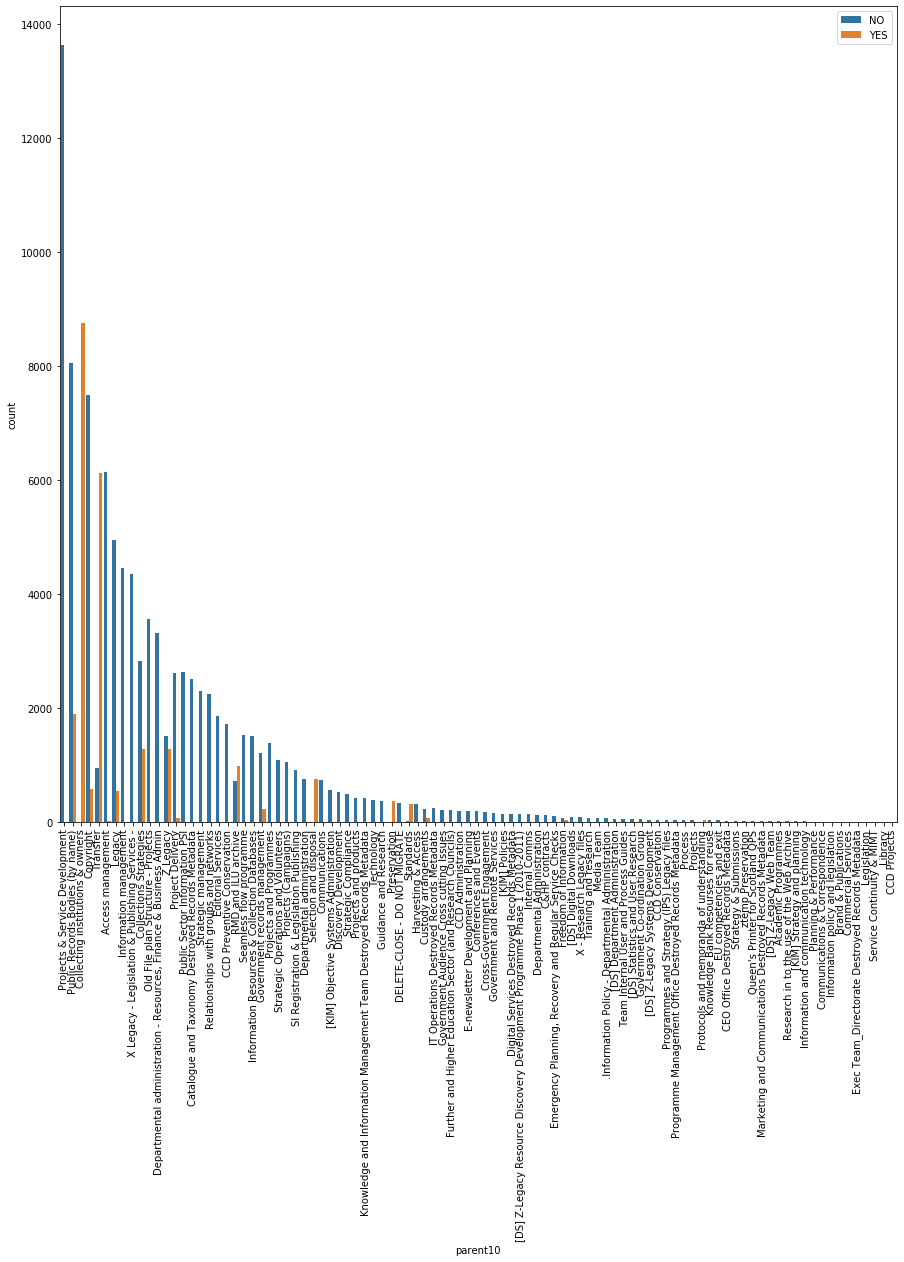

In [28]:
%matplotlib inline
plt.figure (figsize=(15,15))
p =sns.countplot(data = metadata_df, x='parent10', order=metadata_df['parent10'].value_counts().index, hue='selected')
plt.legend(loc='upper right')
p.set_xticklabels(p.get_xticklabels(),rotation = 90)

In [29]:
metadata_df['fileextension'].nunique()

143

In [30]:
metadata_df['fileextension'].unique()

array(['xls', 'doc', 'XLS', 'msg', 'docx', 'txt', 'tsv', 'xlsx', 'pdf',
       'ppt', 'pptx', 'csv', 'obr', 'PDF', 'py', 'zip', 'htm', 'DOC',
       'jpg', 'vsd', 'dot', 'tif', 'rtf', 'TIF', '   ', 'tmp', 'PPT',
       'JPG', ' tif', 'jpeg', 'mpp', 'bmp', 'gif', 'png', 'xlsm', 'mht',
       'exe', 'mdb', 'dotx', 'xml', 'mov', 'BMP', 'mp4', 'HTM', 'html',
       'trf', 'indd', 'MSG', 'MBX', 'pcx', 'TMP', 'old', 'dat', 'err',
       'dwg', 'db ', 'mdi', 'DOCM', 'srt', 'eps', 'X_X', 2002, 3, 'RTF',
       'pmd', 'pub', 'XEN', 'lnk', 'josl', 'flv', 'XLSX', 'gz', 'MPP',
       'wav', 'PNG', 'Pate', 'url', 'psd', 'vsdx', 'xltx', 'ini', 'hlf',
       'rl8', 'xlw', 'doc ', 'HTML', 'LNK', 'LWP', 'ent', 'dtd', 'dcl',
       'nav', 'ssh', 'sgm', 'log', 'new', 'LOG', 'wpd', 'dmp', 'dll',
       'DOCX', 'xlsb', 'CSV', 'lrf', 'pdb', 'epub', 'mobi', 'pem', 'xltm',
       'p7m', 'jfif', 'owl', 'svg', 'ttl', 'ZIP', 'odt', 'srx', 'mp3',
       'xps', 'potx', 'mm ', 'xsd', 'ps ', 'docm', 'ppsx', 'ePub', 

[Text(0, 0, 'msg'),
 Text(0, 0, 'doc'),
 Text(0, 0, 'xls'),
 Text(0, 0, 'pdf'),
 Text(0, 0, 'xml'),
 Text(0, 0, 'docx'),
 Text(0, 0, 'rtf'),
 Text(0, 0, 'xlsx'),
 Text(0, 0, 'htm'),
 Text(0, 0, 'DOC'),
 Text(0, 0, 'JPG'),
 Text(0, 0, 'txt'),
 Text(0, 0, 'tif'),
 Text(0, 0, 'jpg'),
 Text(0, 0, 'MSG'),
 Text(0, 0, 'PDF'),
 Text(0, 0, 'ppt'),
 Text(0, 0, 'MBX'),
 Text(0, 0, 'zip'),
 Text(0, 0, 'png'),
 Text(0, 0, 'pptx'),
 Text(0, 0, 'obr'),
 Text(0, 0, 'mht'),
 Text(0, 0, 'csv'),
 Text(0, 0, 'PNG'),
 Text(0, 0, 'dotx'),
 Text(0, 0, 'vsd'),
 Text(0, 0, 'XLS'),
 Text(0, 0, 'mpp'),
 Text(0, 0, 'bmp'),
 Text(0, 0, 'dot'),
 Text(0, 0, 'TIF'),
 Text(0, 0, 'gif'),
 Text(0, 0, '   '),
 Text(0, 0, 'XLSX'),
 Text(0, 0, 'mp4'),
 Text(0, 0, 'html'),
 Text(0, 0, 'pub'),
 Text(0, 0, 'xsd'),
 Text(0, 0, 'wmv'),
 Text(0, 0, 'xlsm'),
 Text(0, 0, 'ent'),
 Text(0, 0, 'sql'),
 Text(0, 0, 'PPT'),
 Text(0, 0, 'xltm'),
 Text(0, 0, 'fm'),
 Text(0, 0, 'HTM'),
 Text(0, 0, 'psd'),
 Text(0, 0, 'pmd'),
 Text(0, 0, '

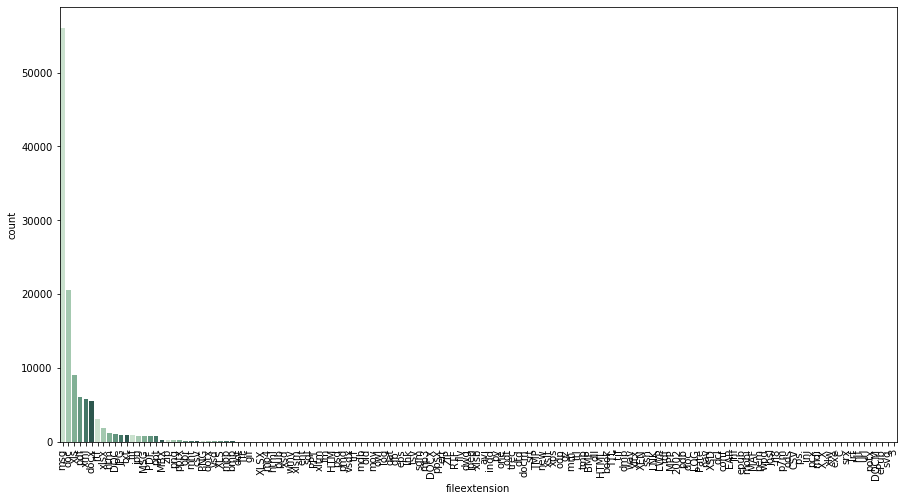

In [31]:
%matplotlib inline
plt.figure (figsize=(15,8))
p =sns.countplot(data =metadata_df, x='fileextension', order=metadata_df['fileextension'].value_counts().index,palette=sns.color_palette("ch:2.5,-.2,dark=.3"))
p.set_xticklabels(p.get_xticklabels(),rotation = 90)

Data preprocessing
* Remove files if they are known media or other avoidable file types
* walk through the file folder structures and if readable, then copy into data frame

In [32]:
media_files = ['tif','TIF','JPG','jpg','gif','png','mdi','MOV','jfif',
               'BMP',' tif','jpeg','bmp','mp4','wav','PNG','trec','EAP',
               'mp3','mdi','flv','eps','mht','flv','wmv','avi']
other_files_to_avoid = ['zip','exe','gz','dll','ZIP','lnk','LNK','conf','C','TTL',
                       'vsd','ini','pub','XEN','josl','MPP','MAF','xsd','pem','srx']

In [33]:
# metadata_reduced_df=metadata_reduced_df[metadata_reduced_df.selected=="YES"]
metadata_reduced_df  = metadata_df[np.logical_not( metadata_df['fileextension'].isin(media_files+other_files_to_avoid))].copy()

In [34]:
print(len(metadata_reduced_df))


114918


In [35]:
fileextension_selected=(metadata_df[metadata_df.selected=="YES"]['fileextension'].value_counts()>10)
#metadata_reduced_df.fileextension[fileextension_selected]
# metadata_reduced_df['fileextension']fileextension_selected.where(fileextension_selected==True)
fileextension_selected=fileextension_selected[fileextension_selected].index.values
len(fileextension_selected)

23

[Text(0, 0, 'msg'),
 Text(0, 0, 'doc'),
 Text(0, 0, 'rtf'),
 Text(0, 0, 'pdf'),
 Text(0, 0, 'docx'),
 Text(0, 0, 'DOC'),
 Text(0, 0, 'MSG'),
 Text(0, 0, 'xls'),
 Text(0, 0, 'xlsx'),
 Text(0, 0, 'PDF'),
 Text(0, 0, 'MBX'),
 Text(0, 0, 'obr'),
 Text(0, 0, 'JPG'),
 Text(0, 0, 'ppt'),
 Text(0, 0, 'jpg'),
 Text(0, 0, 'dotx'),
 Text(0, 0, 'XLSX'),
 Text(0, 0, 'htm'),
 Text(0, 0, 'dot'),
 Text(0, 0, 'xsd'),
 Text(0, 0, 'bmp'),
 Text(0, 0, 'xlsm'),
 Text(0, 0, 'xltm'),
 Text(0, 0, 'vsd'),
 Text(0, 0, 'XLS'),
 Text(0, 0, 'pptx'),
 Text(0, 0, 'html'),
 Text(0, 0, 'RTF'),
 Text(0, 0, 'csv'),
 Text(0, 0, 'indd'),
 Text(0, 0, 'zip'),
 Text(0, 0, 'txt'),
 Text(0, 0, 'xml'),
 Text(0, 0, 'mdb'),
 Text(0, 0, 'pub'),
 Text(0, 0, 'mht'),
 Text(0, 0, 'PPT'),
 Text(0, 0, 'gif'),
 Text(0, 0, 'exe'),
 Text(0, 0, 'mp4'),
 Text(0, 0, 'docm'),
 Text(0, 0, 'xltx'),
 Text(0, 0, 'url'),
 Text(0, 0, 'mpp'),
 Text(0, 0, '2002'),
 Text(0, 0, 'X_X'),
 Text(0, 0, 'psd'),
 Text(0, 0, '3')]

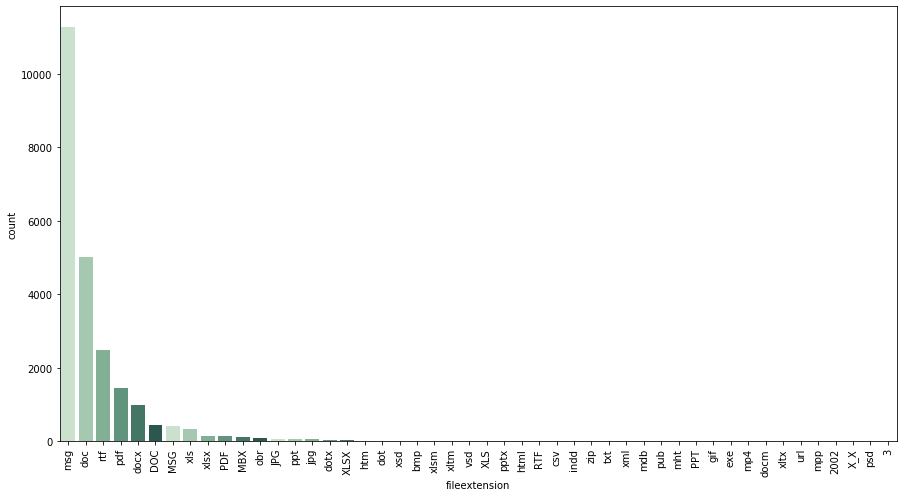

In [36]:
%matplotlib inline
# df_plot=metadata_reduced_df[metadata_reduced_df.selected=="YES"]
df_plot=metadata_df[metadata_df.selected=="YES"]
plt.figure (figsize=(15,8))
p =sns.countplot(data =df_plot, x='fileextension', order=df_plot['fileextension'].value_counts().index,palette=sns.color_palette("ch:2.5,-.2,dark=.3"))
p.set_xticklabels(p.get_xticklabels(),rotation = 90)

109154


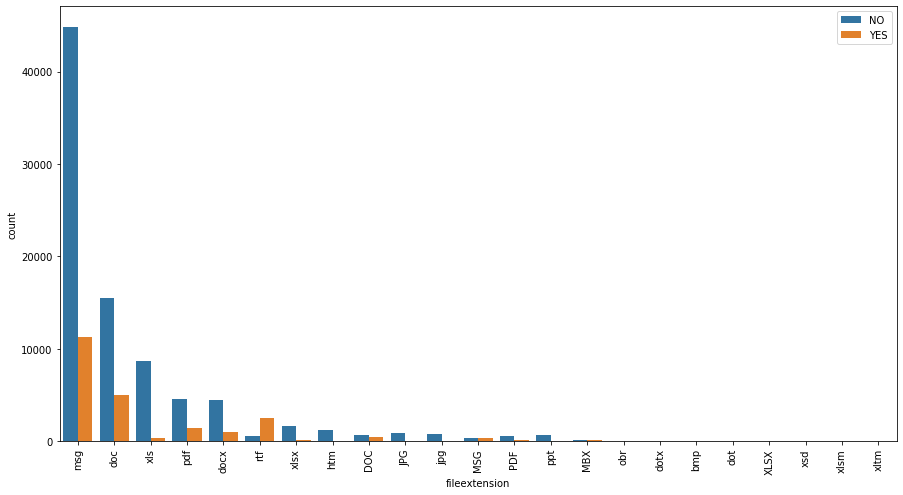

In [37]:
%matplotlib inline
# df_plot=metadata_reduced_df[metadata_reduced_df.fileextension.isin(fileextension_selected)];
df_plot=metadata_df[metadata_df.fileextension.isin(fileextension_selected)];
print(len(df_plot))
# df_plot=metadata_df;
plt.figure (figsize=(15,8))
p =sns.countplot(data = df_plot, x='fileextension', order=df_plot['fileextension'].value_counts().index, hue='selected');
plt.legend(loc='upper right');
p.set_xticklabels(p.get_xticklabels(),rotation = 90);

In [38]:
df_plot[df_plot.selected=="YES"].fileextension.value_counts()

msg     11271
doc     5017 
rtf     2492 
pdf     1451 
docx    977  
DOC     446  
MSG     408  
xls     329  
xlsx    155  
PDF     146  
MBX     119  
obr     86   
JPG     68   
ppt     62   
jpg     49   
dotx    27   
XLSX    26   
htm     16   
dot     15   
bmp     14   
xsd     14   
xlsm    12   
xltm    11   
Name: fileextension, dtype: int64

Check if file type has got anything to do with selection

In [39]:
metadata_reduced_df.columns

Index(['fileextension', 'disposal_schedule', 'repository', 'datelastmodified',
       'parent11', 'parent10', 'parent9', 'parent8', 'parent7', 'parent6',
       'parent5', 'parent4', 'parent3', 'parent2', 'parent1', 'originalname',
       'documentname', 'trim_11', 'trim_10', 'trim_9', 'trim_8', 'trim_7',
       'trim_6', 'trim_5', 'trim_4', 'trim_3', 'trim_2', 'trim_1',
       'ret_schedule', 'selected'],
      dtype='object')

In [53]:
def set_filepath(row):
    file_path = ''
    file_path1 = ''
    #file_path2 = ''
    for i in range(11,0,-1):
        trim = 'trim_'+str(i)
        
        if (row[trim] != 'no name'):
            file_path = file_path+str(row[trim])+'/'
        else:
            break
            
    #print(str(row['documentname']))
    file_path1 = file_path+str(row['documentname'])+'['+str(row['originalname'])+']'+'.'+str(row['fileextension'])
    #file_path2 = file_path+str(row['documentname'])+'.'+str(row['fileextension'])+'['+str(row['originalname'])+']'       

        
    #return [file_path1, file_path2]
    return file_path1

metadata_reduced_df['file_path'] = metadata_reduced_df.apply(lambda row: set_filepath(row), axis=1)
#metadata_reduced_df['file_path'][10:15]


In [41]:
# test = metadata_reduced_df[10:20].copy()

# test['file_path']= test.apply(lambda row: set_filepath(row), axis=1)
# test['file_path']

**TO DO**
* get file size
* duplicate files
* text/emails Vs media selected/not selected
* repo selection
* top folder selection


In [50]:
'''
#function to add more rows
def get_file_details(file_path, folder_path_a):
    
    file_path1 = folder_path_a+file_path[0] 
    file_path2 = folder_path_a+file_path[1]
    file_size = 0
    last_modified = 0
    
    try:
        if os.path.exists(file_path1): 
            #print(file_path1)
            stat = os.stat(file_path1)
            
        elif os.path.exists(file_path2):
            #print(file_path2)
            stat = os.stat(file_path2)
        file_size = stat.st_size
        last_modified = stat.st_mtime
          
    except:    
        
        print('Exception: Path does not exist', file_path);
        pass
    return pd.Series([file_size,last_modified])
    '''

In [64]:
import time
#function to add more rows
def get_file_details(file_path, folder_path_a):
    
    file_path1 = folder_path_a+file_path 
    #file_path2 = folder_path_a+file_path[1]
    file_size = 0
    last_modified = 0
    
    try:
        if os.path.exists(file_path1): 
            #print(file_path1)
            stat = os.stat(file_path1)
            
        
            file_size = stat.st_size
            last_modified = time.ctime(stat.st_mtime)
          
    except:    
        
        print('Exception: Path does not exist', file_path);
        pass
    return pd.Series([file_size,last_modified])

In [55]:
'''

test = metadata_reduced_df[10:20].copy()
# # lambdafunc = lambda x: get_file_details(x['file_path'],folder_path_a)
# # test[['file_size','last_modified']] = test.apply(lambdafunc, axis=1)
test[['file_size','last_modified']] = test.apply(lambda row: get_file_details(row['file_path'],folder_path_a), axis=1)
print(test['file_size'])
'''

10    41984.0 
11    39424.0 
12    26624.0 
13    47616.0 
14    24576.0 
15    49152.0 
16    45568.0 
17    45056.0 
18    41472.0 
19    226304.0
Name: file_size, dtype: float64


In [65]:
# add columns to metadata file
metadata_reduced_df [['file_size','last_modified']] = metadata_reduced_df.apply(lambda row: get_file_details(row['file_path'],folder_path_a), axis=1)

In [57]:
#just for testing
metadata_reduced_df[metadata_reduced_df['file_size'] == 0]['file_path']

318       ZCDRM/CaTDRM/2019/PRCoPROCAT/Tac/TDF/TG12/tg 12 tab sep.txt[A38840.1].txt                             
319       ZCDRM/CaTDRM/2019/PRCoPROCAT/Tac/TDF/TG12/TG12-series.txt[A38841.1].txt                               
340       ZCDRM/CaTDRM/2019/PRCoPROCAT/Tac/TDF/TG12/TG12-pieces-items.txt[A38842.1].txt                         
341       ZCDRM/CaTDRM/2019/PRCoPROCAT/Tac/TDF/TG13/tg 13 tab sep.txt[A38794.1].txt                             
342       ZCDRM/CaTDRM/2019/PRCoPROCAT/Tac/TDF/TG13/TG13-series.txt[A38795.1].txt                               
                                           ...                                                                  
118394    ZCDRM/ITODRM/2019/PROCAT/e_1/FOIPROCATe/c_2/d_1/Emailing_ PSA129.01 Project Plan v1.mpp[A588253.1].msg
118395    ZCDRM/ITODRM/2019/PROCAT/e_1/FOIPROCATe/c_2/d_1/Error Messages[A588254.1].msg                         
118396    ZCDRM/ITODRM/2019/PROCAT/e_1/FOIPROCATe/c_2/d_1/Progress Report 15-10-04[A588256.1].ms

Copy the metadata file to a csv. Later it will be easier to take from there

In [66]:
metadata_reduced_df.to_csv('H:/AI_for_Selection/metadata_with_filesize_lastmodified.csv')

Build a simple classifier

In [96]:
metadata_reduced_df.columns

Index(['Unnamed: 0', 'fileextension', 'disposal_schedule', 'repository',
       'datelastmodified', 'parent11', 'parent10', 'parent9', 'parent8',
       'parent7', 'parent6', 'parent5', 'parent4', 'parent3', 'parent2',
       'parent1', 'originalname', 'documentname', 'trim_11', 'trim_10',
       'trim_9', 'trim_8', 'trim_7', 'trim_6', 'trim_5', 'trim_4', 'trim_3',
       'trim_2', 'trim_1', 'ret_schedule', 'selected', 'file_path',
       'file_size', 'last_modified'],
      dtype='object')

In [128]:
X = metadata_reduced_df[['fileextension', 'disposal_schedule', 'repository','parent11','parent10', 'datelastmodified','ret_schedule','file_size']].copy()

In [134]:
y = metadata_reduced_df['selected' ].copy()

In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114918 entries, 0 to 114917
Data columns (total 8 columns):
fileextension        114918 non-null object
disposal_schedule    114918 non-null object
repository           114918 non-null object
parent11             114918 non-null object
parent10             114918 non-null object
datelastmodified     114918 non-null object
ret_schedule         114918 non-null object
file_size            114918 non-null int64
dtypes: int64(1), object(7)
memory usage: 7.0+ MB


In [131]:
X['ret_schedule']  = X['ret_schedule'].astype(str)

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [137]:
#Fitting DT to the training set
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier(criterion='entropy', random_state=100)
cls.fit(X_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [139]:
y_pred = cls.predict(X_test)


In [142]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18220,     0],
       [    0,  4764]], dtype=int64)

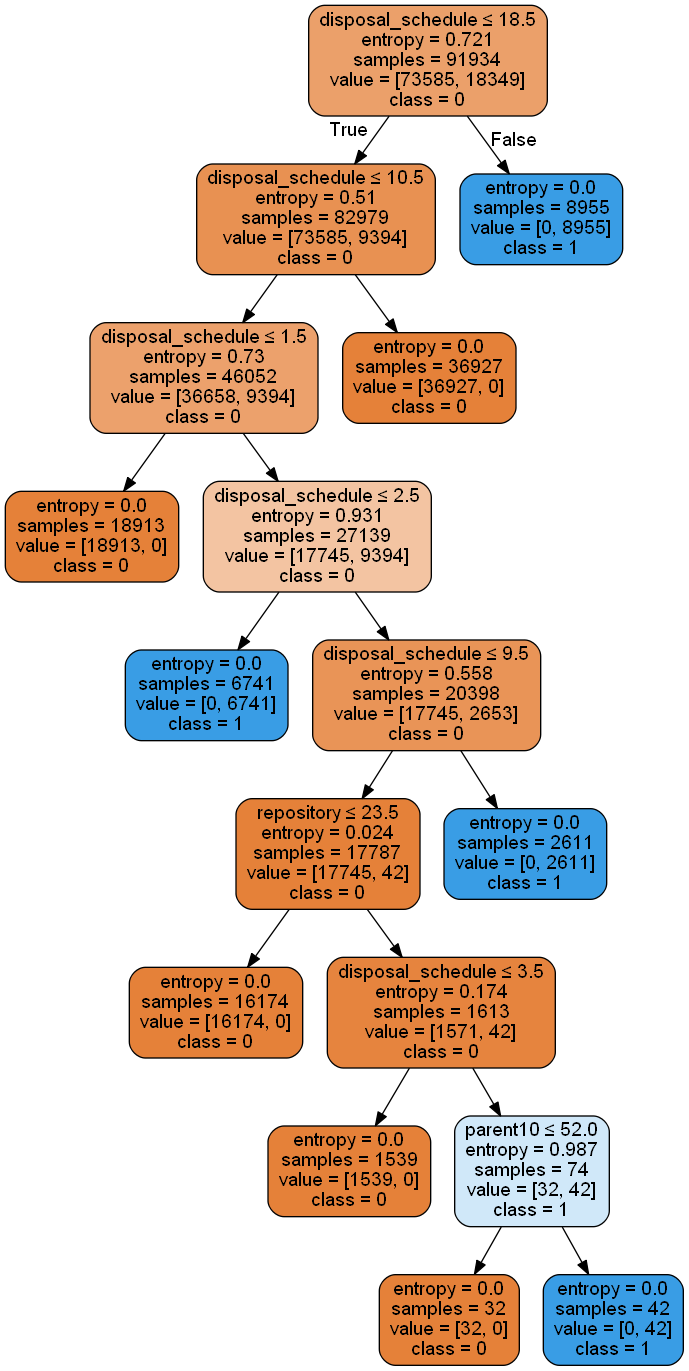

In [145]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols  = ['fileextension', 'disposal_schedule', 'repository','parent11','parent10', 'datelastmodified','ret_schedule','file_size']
dot_data = StringIO()
export_graphviz(cls, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT_.png')
Image(graph.create_png())

In [46]:
'''
def remove_nonascii(file,):
    # read files. Ignore non ascii characters
    f = open(file,'r', encoding='latin-1')
    text = f.read()
    return text.encode("ascii", errors="ignore").decode()


'''

'\ndef remove_nonascii(file,):\n    # read files. Ignore non ascii characters\n    f = open(file,\'r\', encoding=\'latin-1\')\n    text = f.read()\n    return text.encode("ascii", errors="ignore").decode()\n\n\n'

In [47]:
'''
for subdir, dirnames, files  in os.walk(folder_path):
    for filename in files:
        
        extension_list = filename.split('.')
        extension = '.'+extension_list[len(extension_list)-1]
        try:
            if (extension in allowed_list):
                file = subdir+os.sep+filename
                text = remove_nonascii(file)
                print(summarize(text,word_count=20))
        except:
            
'''
    

"\nfor subdir, dirnames, files  in os.walk(folder_path):\n    for filename in files:\n        \n        extension_list = filename.split('.')\n        extension = '.'+extension_list[len(extension_list)-1]\n        try:\n            if (extension in allowed_list):\n                file = subdir+os.sep+filename\n                text = remove_nonascii(file)\n                print(summarize(text,word_count=20))\n        except:\n            \n"

**Finding duplicates**

In [48]:
'''
import sys
#import os
import hashlib

def chunk_reader(fobj, chunk_size=1024):
    """Generator that reads a file in chunks of bytes"""
    while True:
        chunk = fobj.read(chunk_size)
        if not chunk:
            return
        yield chunk

def check_for_duplicates(paths, hash=hashlib.sha1):
    hashes = {}
    for path in paths:
        for dirpath, dirnames, filenames in os.walk(path):
            for filename in filenames:
                full_path = os.path.join(dirpath, filename)
                hashobj = hash()
                for chunk in chunk_reader(open(full_path, 'rb')):
                    hashobj.update(chunk)
                file_id = (hashobj.digest(), os.path.getsize(full_path))
                duplicate = hashes.get(file_id, None)
                if duplicate:
                    print "Duplicate found: %s and %s" % (full_path, duplicate)
                else:
                    hashes[file_id] = full_path

if sys.argv[1:]:
    check_for_duplicates(sys.argv[1:])
else:
    print "Please pass the paths to check as parameters to the script"'''

'\nimport sys\n#import os\nimport hashlib\n\ndef chunk_reader(fobj, chunk_size=1024):\n    """Generator that reads a file in chunks of bytes"""\n    while True:\n        chunk = fobj.read(chunk_size)\n        if not chunk:\n            return\n        yield chunk\n\ndef check_for_duplicates(paths, hash=hashlib.sha1):\n    hashes = {}\n    for path in paths:\n        for dirpath, dirnames, filenames in os.walk(path):\n            for filename in filenames:\n                full_path = os.path.join(dirpath, filename)\n                hashobj = hash()\n                for chunk in chunk_reader(open(full_path, \'rb\')):\n                    hashobj.update(chunk)\n                file_id = (hashobj.digest(), os.path.getsize(full_path))\n                duplicate = hashes.get(file_id, None)\n                if duplicate:\n                    print "Duplicate found: %s and %s" % (full_path, duplicate)\n                else:\n                    hashes[file_id] = full_path\n\nif sys.argv[1:]:\